In [1]:
import pandas as pd
from datetime import datetime
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [24]:
df = pd.read_csv('./StudentsPerformance_exam1.csv')

In [6]:
df.shape

(1000, 8)

## 1) ¿Qué tipo de variables tiene el dataset? Detalle el tipo de variable de cada columna.


In [8]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,non-binary,group B,bachelor's degree,standard,none,72.0,72.0,NaN
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,NaN,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


In [13]:
df['gender'].unique()

array(['non-binary', 'female', 'male', nan], dtype=object)

In [14]:
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E', nan],
      dtype=object)

In [15]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school', nan],
      dtype=object)

In [16]:
df['lunch'].unique()

array(['standard', 'free/reduced', nan], dtype=object)

In [17]:
df['test preparation course'].unique()

array(['none', 'completed', nan], dtype=object)

## 2) ¿Qué tipo de problemas de calidad de datos logra identificar? Defina e implemente las estrategias de limpieza de datos que correspondan.

In [25]:
df['gender'].isnull().sum()

47

In [31]:
df['gender'].fillna("not reported", inplace = True)

In [29]:
df['gender'].isnull().sum()

0

In [33]:
df['race/ethnicity'].fillna("not reported", inplace = True)

In [35]:
df['parental level of education'].fillna("not reported", inplace = True)

In [37]:
df['test preparation course'].fillna("not reported", inplace = True)

In [46]:
df['math score'].mean(axis = 0, skipna = False)

66.12012

In [39]:
df['math score'].fillna(66.12, inplace = True)

In [44]:
df['reading score'].mean(axis = 0, skipna = False)

69.257

In [41]:
df['reading score'].fillna(69.25, inplace = True)

In [47]:
df['writing score'].mean(axis = 0, skipna = False)

68.18182

In [43]:
df['writing score'].fillna(68.18, inplace = True)

### Reemplazo valores en parental level

In [48]:
df['parental level of education'].replace({'some high school':'high school',
                                             'some college':'bachelor\'s degree'},inplace = True)
df['parental level of education'].unique()

array(["bachelor's degree", "master's degree", "associate's degree",
       'high school', 'not reported'], dtype=object)

## 3)¿En qué asignatura en promedio los estudiantes obtuvieron un mejor puntaje?

In [53]:
df['math score'].mean()

66.12012000000006

In [54]:
df['reading score'].mean()

69.257

In [68]:
df['writing score'].mean()

68.18182

<AxesSubplot:>

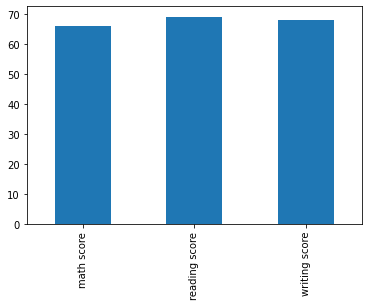

In [71]:
df.mean(numeric_only= True).plot(kind='bar')

<AxesSubplot:xlabel='gender'>

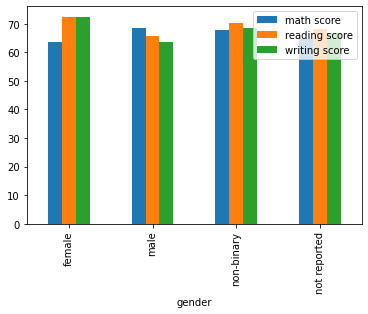

In [64]:
df[['gender','math score', 'reading score', 'writing score']].groupby('gender').mean().plot(kind='bar')

<AxesSubplot:xlabel='parental level of education'>

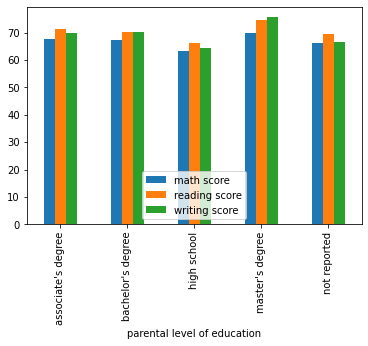

In [65]:
df[['parental level of education','math score', 'reading score', 'writing score']].groupby('parental level of education').mean().plot(kind='bar')

<AxesSubplot:xlabel='race/ethnicity'>

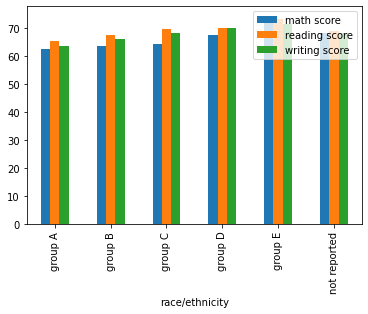

In [66]:
df[['race/ethnicity','math score', 'reading score', 'writing score']].groupby('race/ethnicity').mean().plot(kind='bar')

## ¿Existe alguna correlación entre los puntajes obtenidos en las tres asignaturas?

In [74]:
pear_corr = df.corr()
pear_corr

,math score,reading score,writing score
math score,1.000000,0.780656,0.752299
reading score,0.780656,1.000000,0.909290
writing score,0.752299,0.909290,1.000000


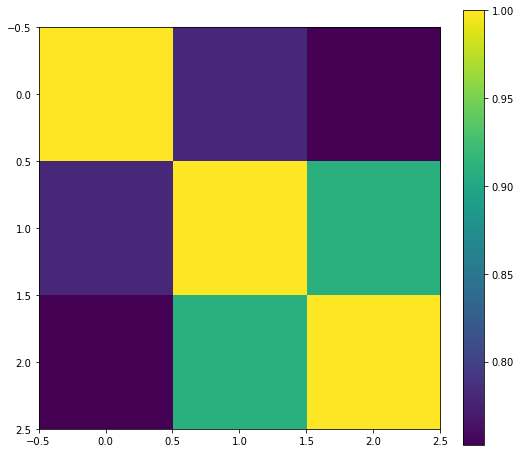

In [75]:
fig, ax = plt.subplots(figsize=(8,8))
im = ax.imshow(pear_corr, interpolation='nearest')
fig.colorbar(im, orientation='vertical', fraction = 0.05)

## 5) ¿Hay alguna diferencia observable en los puntajes de la asignatura de matemáticas entre géneros? ¿Qué género obtuvo en promedio los mejores puntajes?

In [84]:
def normalize(x):
    print(x)
    #return round(x / (df['math score'].mean()) *100,2)

<AxesSubplot:xlabel='gender'>

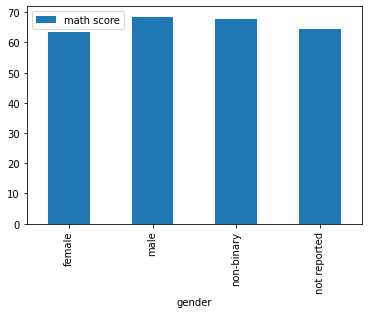

In [91]:
df[['gender','math score']].groupby('gender').mean().plot(kind='bar')

In [109]:
#df.groupby('gender')['female'].mean()
df.groupby('gender')['math score'].mean()

gender
female          63.583491
male            68.522383
non-binary      67.706014
not reported    64.449362
Name: math score, dtype: float64

## ¿Qué nivel de escolaridad tienen los padres de los estudiantes que obtuvieron un puntaje por encima del percentil 85 en la asignatura de escritura? ¿Cómo se distribuye la escolaridad entre esta población?

In [146]:
df['writing score'].quantile(0.85)

83.0

In [147]:
df_percentile = df.loc[df['writing score'] > df['writing score'].quantile(0.85)]
df_percentile['parental level of education'].unique()

array(["bachelor's degree", "master's degree", 'high school',
       "associate's degree", 'not reported'], dtype=object)

<AxesSubplot:xlabel='parental level of education'>

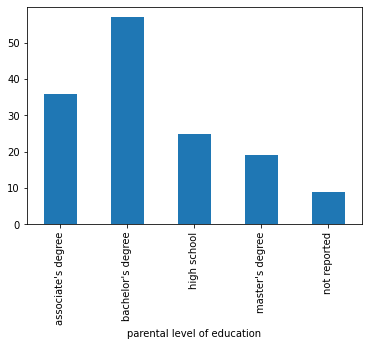

In [148]:
df_percentile.groupby('parental level of education').size().plot(kind = "bar", stacked=True)

In [149]:
df_percentile.insert(0,'cantidad', 1)

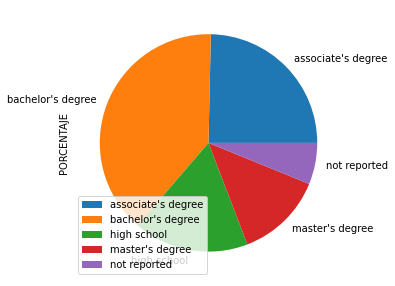

In [150]:
plot_percentile = df_percentile[['parental level of education','cantidad']].groupby('parental level of education').sum()
plot_percentile['PORCENTAJE'] = plot_percentile['cantidad']/plot_percentile['cantidad'].sum()*100
plot_percentile.plot.pie(y='PORCENTAJE', figsize=(5, 5)).legend(loc='lower left')

In [128]:
plot_percentile

,cantidad,PORCENTAJE
parental level of education,,
associate's degree,36,24.657534
bachelor's degree,57,39.041096
high school,25,17.123288
master's degree,19,13.013699
not reported,9,6.164384


## 7) ¿Qué porcentaje de los estudiantes obtuvieron puntajes iguales o superiores a 90 en las tres asignaturas? De estos estudiantes¿que porcentaje estudió para los exámenes?

In [142]:
df_prom_sup = df.loc[(df['writing score'] > 90) & (df['math score'] > 90) & (df['reading score'] > 90)]
prom_sup = len(df_prom_sup)
prom_sup

19

In [143]:
total = len(df)
total

1000

In [138]:
prom_sup/total

0.019

In [144]:
df_prom_sup['test preparation course'].unique()

array(['completed', 'none', 'not reported'], dtype=object)

In [151]:
df_prom_sup.insert(0,'cantidad', 1)

In [152]:
plot_prom_sup = df_prom_sup[['test preparation course','cantidad']].groupby('test preparation course').sum()
plot_prom_sup['PORCENTAJE'] = plot_prom_sup['cantidad']/plot_prom_sup['cantidad'].sum()*100


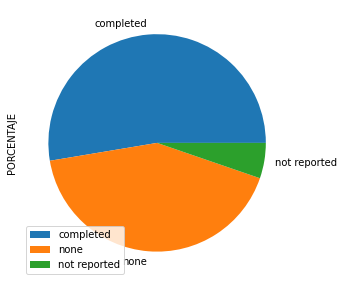

In [153]:
plot_prom_sup.plot.pie(y='PORCENTAJE', figsize=(5, 5)).legend(loc='lower left')

In [154]:
plot_prom_sup

,cantidad,PORCENTAJE
test preparation course,,
completed,10,52.631579
none,8,42.105263
not reported,1,5.263158
